In [1]:
%%time
from datetime import datetime
a = datetime.now()

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("afmhot")
# sns.set_palette("twilight")
# sns.set_style("darkgrid",{"axes.facebolor":"0.90"})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth":1.5})
sns.set_style("whitegrid")
import pylab
pylab.rcParams['figure.figsize'] = (15, 8)
plt.style.use('dark_background')
# g= sns.pairplot(df,hue='species')
# g.fig.set_size_inches(12,12)

import tensorflow as tf
print("# GPUs: ", len(tf.config.experimental.list_physical_devices("GPU")))
import numpy as np
import tensorflow.keras as tfk
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten


from tensorflow.keras.layers import Dense, Activation, Dropout, Input, InputLayer
from tensorflow.keras.optimizers import SGD

# GPUs:  1
CPU times: total: 4.95 s
Wall time: 5.47 s


https://www.kaggle.com/datasets/uciml/adult-census-income

# <font color = 'lime'> Preprocessing </font>

In [2]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler, StandardScaler, OneHotEncoder

In [8]:
df = pd.read_csv("data/adult_census_income/adult.csv")
target = 'income'
# y = df[target]
X = df.loc[:, df.columns != target]
X['index']=X.index
y = pd.read_csv("y.csv")

In [14]:
X = pd.get_dummies(X)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=99)

In [27]:
X_train.dtypes.value_counts()

uint8    102
int64      7
dtype: int64

In [21]:
int64_features = list(X.select_dtypes("int64").columns)
int64_features.remove('index')
int64_features

['age',
 'fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week']

In [37]:
ohe_columns = list(X_train.select_dtypes("uint8").columns)
ohe_columns.append("index")

# <font color ='hotpink'> Scale Data </font>

In [41]:
std_scale_train = StandardScaler()
std_scale_test = StandardScaler()

## <font color ='slateblue'>`X_train` </font>

In [53]:
std_scale_train.fit_transform(X_train[int64_features])

X_train_std = pd.DataFrame(std_scale_train.fit_transform(X_train[int64_features]),columns = int64_features)
X_train_std['index'] = X_train.index
display(X_train_std.shape)

X_train_final = pd.merge(X_train_std,X_train[ohe_columns],on='index')
X_train_final = X_train_final.drop('index',axis=1)
display(X_train_final.shape)

(21815, 7)

(21815, 108)

## <font color ='slateblue'>`X_test` </font>

In [54]:
std_scale_test.fit_transform(X_test[int64_features])

X_test_std = pd.DataFrame(std_scale_train.fit_transform(X_test[int64_features]),columns = int64_features)
X_test_std['index'] = X_test.index
display(X_test_std.shape)

X_test_final = pd.merge(X_test_std,X_test[ohe_columns],on='index')
X_test_final = X_test_final.drop('index',axis=1)
display(X_test_final.shape)

(10746, 7)

(10746, 108)

# <font color = '#7337ed'> Neural Network</font>

# <font color = '#7337ed'> Unscaled:</font>

In [58]:
from tensorflow.keras.layers import Dense, InputLayer, Input
from tensorflow.keras.models import Sequential

In [59]:
model = Sequential()

In [60]:
X_train_final.shape[1]

108

In [61]:
108**(1/3)

4.762203155904598

In [86]:
%%time
#first layer
# model.add(InputLayer(input_shape=X_train.shape[1],))

# model.add(Dense(108, input_dim=108, activation='relu'))

model.add(Dense(108,activation='relu'))
model.add(Dropout(0.33))
model.add(Dense(108,activation='relu'))
model.add(Dropout(0.33))
model.add(Dense(108,activation='relu'))
model.add(Dropout(0.33))
model.add(Dense(54,activation='relu'))
model.add(Dropout(0.33))
model.add(Dense(54,activation='relu'))
model.add(Dropout(0.33))
model.add(Dense(54,activation='relu'))
model.add(Dropout(0.33))
model.add(Dense(27,activation='relu'))
model.add(Dropout(0.33))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam',metrics=["accuracy"])



CPU times: total: 93.8 ms
Wall time: 98.7 ms


In [87]:
2**10

1024

In [103]:
%%time
history=model.fit(X_train_final,y_train, epochs=12,validation_data=(X_test_final,y_test),verbose=1,batch_size=2^6)

Epoch 1/12
5454/5454 [==============================] - 43s 8ms/step - loss: 0.4051 - accuracy: 0.8287 - val_loss: 0.3783 - val_accuracy: 0.8348
Epoch 2/12
5454/5454 [==============================] - 45s 8ms/step - loss: 0.3759 - accuracy: 0.8249 - val_loss: 0.3716 - val_accuracy: 0.8300
Epoch 3/12
5454/5454 [==============================] - 44s 8ms/step - loss: 0.3784 - accuracy: 0.8212 - val_loss: 0.3764 - val_accuracy: 0.8252
Epoch 4/12
5454/5454 [==============================] - 42s 8ms/step - loss: 0.3898 - accuracy: 0.8154 - val_loss: 0.3944 - val_accuracy: 0.7642
Epoch 5/12
5454/5454 [==============================] - 43s 8ms/step - loss: 0.3820 - accuracy: 0.8125 - val_loss: 0.3859 - val_accuracy: 0.8117
Epoch 6/12
5454/5454 [==============================] - 42s 8ms/step - loss: 0.3759 - accuracy: 0.8185 - val_loss: 0.3965 - val_accuracy: 0.8191
Epoch 7/12
5454/5454 [==============================] - 42s 8ms/step - loss: 0.3884 - accuracy: 0.8048 - val_loss: 0.3726 - val_ac

# <font color = '#fa5ff7'> stuck at 0.7597 

In [104]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.405126,0.828742,0.378293,0.834822
1,0.375897,0.824891,0.371585,0.829983
2,0.378444,0.821178,0.376352,0.825237
3,0.389761,0.815448,0.394388,0.764191
4,0.382017,0.812514,0.385914,0.811744
5,0.375891,0.818474,0.396543,0.819095
6,0.388390,0.804813,0.372626,0.836963
7,0.384337,0.806968,0.397375,0.764191
8,0.396334,0.805317,0.380743,0.824586
9,0.396819,0.800321,0.416957,0.830542


<AxesSubplot:>

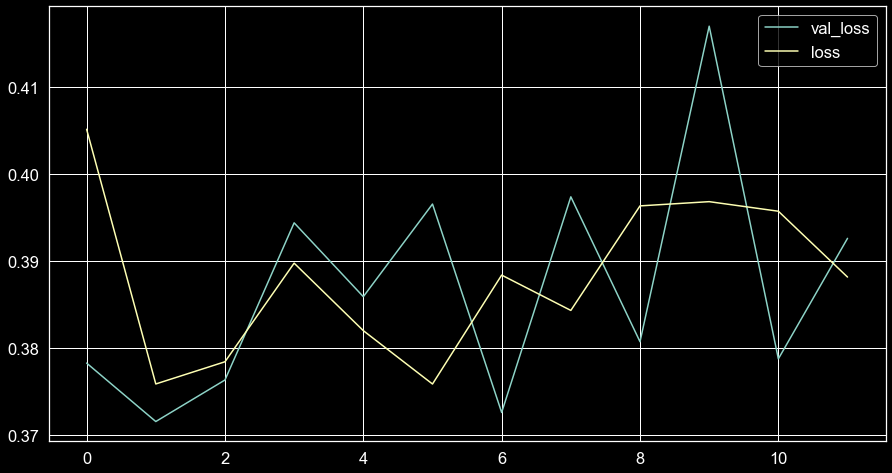

In [105]:
pd.DataFrame(history.history)[['val_loss','loss']].plot()

<AxesSubplot:>

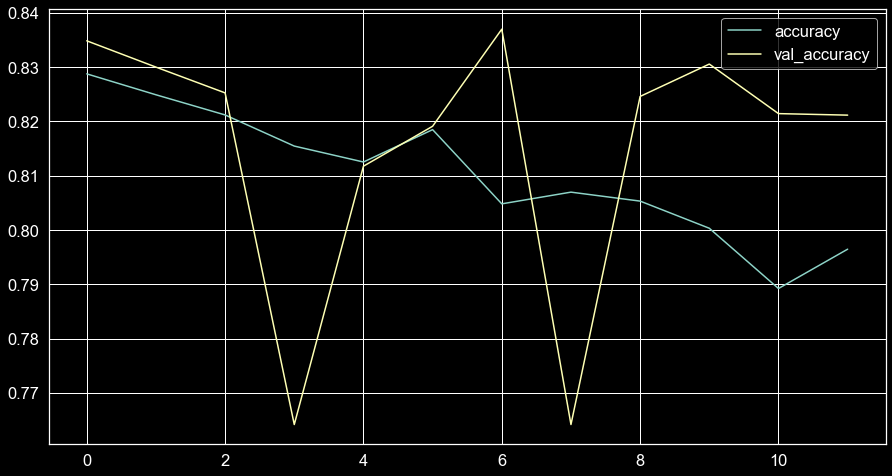

In [106]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()

In [107]:
X_test

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,index,workclass_?,workclass_Federal-gov,workclass_Local-gov,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
31850,37,140673,10,0,0,40,31850,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3537,25,262245,11,3418,0,40,3537,1,0,0,...,0,0,0,0,0,0,0,1,0,0
9258,51,163052,9,0,0,40,9258,0,0,0,...,0,0,0,0,0,0,0,1,0,0
20399,64,86837,12,0,0,40,20399,0,1,0,...,0,0,0,0,0,0,0,1,0,0
13644,43,198965,14,0,0,40,13644,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16963,57,200316,10,0,0,40,16963,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8252,59,381851,5,0,0,40,8252,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2969,69,169717,13,6418,0,45,2969,0,0,0,...,0,0,0,0,0,0,0,1,0,0
25792,59,170411,4,0,0,40,25792,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [108]:
pred = model.predict(X_test_final)

In [109]:
pred

array([[0.6365639 ],
       [0.09715095],
       [0.3423309 ],
       ...,
       [0.6365639 ],
       [0.19406214],
       [0.09715095]], dtype=float32)

In [110]:
final_pred = pred > 0.5

In [111]:
from sklearn.metrics import classification_report, confusion_matrix

In [112]:
print(classification_report(y_test,final_pred))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88      8212
           1       0.60      0.72      0.65      2534

    accuracy                           0.82     10746
   macro avg       0.75      0.79      0.77     10746
weighted avg       0.84      0.82      0.83     10746



In [67]:
#############
# model = tfk.models.Sequential()
# opt = SGD(learning_rate =0.1)

# X_train.shape

# model.add(InputLayer(input_shape=(X_train.shape[1],)))
# model.add(Dense(1))
# model.compile(loss='mse',optimizer='adam')
# print(model.summary())

# history = model.fit(X_train, y_train, verbose=0,epochs=3000, validation_data = (X_test, y_test))

# pd.DataFrame(hist).plot()

# weights=model.layers[0].get_weights()[0]
# biases=model.layers[0].get_weights()[1]
# weights,biases